In [53]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import interpolate
from scipy import special
import pandas as pd

def read_data(model_name, relax_time, time_step, total_time=100):
    line_width = 5e3 #The width of the line (a mesh with infinite points would need 0 width)
    
    #construct path string
    path = "../"+str(model_name)+"/Analysis/"+str(total_time)+"yrs_relax="+str(relax_time)+"_"+str(time_step)+".csv"
    
    model_output_df = pd.read_csv(path)
    
    #select rows from the dataframe where y is less then the specified width
    x_line = model_output_df.loc[(model_output_df['Points_1'] < 5000) & (model_output_df['Points_1'] > 0)]
    
    x = np.asarray(x_line['Points_0'])
    disp_x = np.asarray(x_line['displacement_0'])
    disp_y = np.asarray(x_line['displacement_1'])
    disp_z = np.asarray(x_line['displacement_2'])
    vel_x = np.asarray(x_line['velocity_0'])
    vel_y = np.asarray(x_line['velocity_1'])
    vel_z = np.asarray(x_line['velocity_2'])
    
    return (x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z)

#function to sort x and disp data for plotting
def sort_x_disp(x, disp):
    xs, ys = zip(*sorted(zip(x, disp)))

    return (np.asarray(xs), np.asarray(ys))

    
    

In [68]:
#plot surface displacements over time for a given model
def surface_vert_disp_time(model_name, time_steps, relax_time, dt, plot_title_name=None):
    
    #set up plot for uz
    plt.grid()
    plt.xlabel('Distance from center (km)')
    plt.ylabel('Vertical Displacement (m)')
    if plot_title_name == None:
        plt.title("Vertical Surface Displacements for "+ model_name + r",  $\tau$="+str(relax_time))
    else:
        plt.title("Vertical Surface Displacements for "+ plot_title_name + r",  $\tau$="+str(relax_time))
    
    #iterate through time steps
    for t in time_steps:
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_data(model_name, relax_time, t) #get data
        
        #sort x and disp z
        x, disp_z = sort_x_disp(x, disp_z)
        #plot the data
        plt.scatter(x/1e3, disp_z, label="time="+str(t), s=5)
        plt.plot(x/1e3, disp_z)
        
    plt.legend()
    plt.show()
    
    
def displacement_velocity_plots(model_name, time_steps, relax_time, dt, plot_title_name=None):
    
    #collect max uz, ur, vz, vr
    uz_max = []
    ur_max = []
    vz_max = []
    vr_max = []
    
    uz_norm = 1
    ur_norm = 1
    vz_norm = 1
    vr_norm = 1
    for t in time_steps:
        x, disp_x, disp_y, disp_z, vel_x, vel_y, vel_z = read_data(model_name, relax_time, t) #get data
        
        uz_max.append(max(disp_z))
        ur_max.append(max(disp_x))
        
        if t != 0:
            vz_max.append(vel_z[list(disp_z).index(max(disp_z))])
            vr_max.append(vel_x[list(disp_x).index(max(disp_x))])
         
        #normalize by elastic response
        if t==0:
            uz_norm = max(disp_z)
            ur_norm = max(disp_x)
            vz_norm = max(vel_z)
            vr_norm = max(vel_x)
            
    
    #set up subplots for displacement
    fig, ax = plt.subplots(2)
    ax[0].set_ylabel(r"Normalized max $u_z(r)$")
    ax[1].set_ylabel(r"Normalized max $u_x(r)$")
    ax[1].set_xlabel("Time (years)")
    ax[0].grid()
    ax[1].grid()
    
    if plot_title_name == None:
        ax[0].set_title("Normalized Maximum Displacements for "+ model_name+ r",  $\tau$="+str(relax_time))
    else:
        ax[0].set_title("Normalized Maximum Displacements for "+ plot_title_name+ r",  $\tau$="+str(relax_time))
     
    #plot displacements
    ax[0].scatter(time_steps, np.asarray(uz_max)/uz_norm)
    ax[0].plot(time_steps, np.asarray(uz_max)/uz_norm)
    
    ax[1].scatter(time_steps, np.asarray(ur_max)/ur_norm)
    ax[1].plot(time_steps, np.asarray(ur_max)/ur_norm)
    
    
     #set up subplots for velocity
    fig, ax = plt.subplots(2)
    ax[0].set_ylabel(r"Normalized $v_z(r)$")
    ax[1].set_ylabel(r"Normalized $v_x(r)$")
    ax[1].set_xlabel("Time (years)")
    ax[0].grid()
    ax[1].grid()
    
    if plot_title_name == None:
        ax[0].set_title("Normalized Velocities of the maximum displacements for "+ model_name+ r",  $\tau$="+str(relax_time))
    else:
        ax[0].set_title("Normalized Velocities of the maximum displacements for "+ plot_title_name+ r",  $\tau$="+str(relax_time))
     
    #plot velocities
    time_steps.remove(0)
    ax[0].scatter(time_steps, np.asarray(vz_max)/vz_norm)
    ax[0].plot(time_steps, np.asarray(vz_max)/vz_norm)
    
    ax[1].scatter(time_steps, np.asarray(vr_max)/vr_norm)
    ax[1].plot(time_steps, np.asarray(vr_max)/vr_norm)
        
    
        

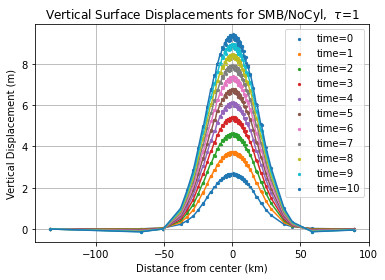

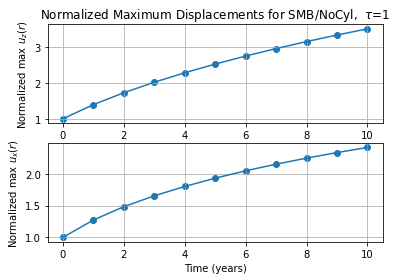

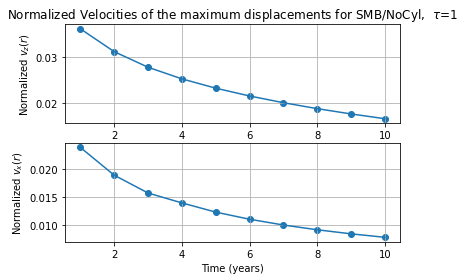

In [69]:
time_steps = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

surface_vert_disp_time("SMB/NoCyl", time_steps, 1, 1)
displacement_velocity_plots("SMB/NoCyl", time_steps, 1, 1)